# **Praktikum II & III Machine Learning**

'''
=================================================
Nama  : Aulia Rahma Dewi

NPM : F1F022017

=================================================
'''

# Latar Belakang

Perkembangan teknologi komputasi telah mendorong munculnya machine learning sebagai pendekatan yang mampu memproses data dalam jumlah besar dan menghasilkan pola yang bermanfaat. Konsep ini berfokus pada bagaimana sistem dapat belajar dari data untuk membuat prediksi maupun klasifikasi tanpa harus diprogram secara eksplisit. Berbagai algoritma digunakan untuk membangun model yang mampu menyesuaikan diri terhadap karakteristik data, sehingga menghasilkan keputusan yang lebih akurat dan efisien. Pada konteks machine learning, terdapat berbagai algoritma dan teknik yang digunakan untuk mengolah dan memahami data, membangun model, serta membuat prediksi atau keputusan. Machine Learning dapat diterapkan dalam berbagai bidang seperti pengenalan wajah, pengenalan suara, analisis data, pengenalan pola, dan masih banyak lagi (Ramadhon dkk., 2024).

Regression Tree merupakan algoritma supervised learning yang digunakan untuk tugas regresi, di mana variabel respon berbentuk kontinu. Algoritma ini membangun model prediktif dengan struktur menyerupai pohon keputusan, di mana setiap percabangan mewakili kondisi dari fitur, dan setiap daun menggambarkan nilai prediksi akhir. Proses pembentukan pohon melibatkan pemilihan atribut yang paling relevan, evaluasi model menggunakan metrik seperti Mean Squared Error (MSE) atau R-squared, serta interpretasi hasil melalui visualisasi pohon yang memudahkan analisis (Prasetya, 2020). Regression Tree efektif untuk menangani data non-linear dan memberikan wawasan tentang interaksi antar fitur. Sementara itu, K-Nearest Neighbors (KNN) adalah algoritma supervised learning yang dapat digunakan untuk regresi, di mana prediksi dilakukan berdasarkan rata-rata nilai dari k tetangga terdekat dalam ruang fitur. Algoritma ini sederhana dan non-parametrik, tidak memerlukan asumsi distribusi data, sehingga cocok untuk dataset dengan pola kompleks. Evaluasi KNN melibatkan metrik seperti MSE atau Mean Absolute Error (MAE), dan pemilihan nilai k yang optimal untuk menghindari overfitting atau underfitting (Sari & Nugroho, 2021). KNN sering digunakan dalam aplikasi seperti rekomendasi sistem dan analisis prediktif karena kemampuannya menangani data bising.

Implementasi Regression Tree dan KNN banyak dilakukan menggunakan bahasa pemrograman Python dengan pustaka seperti scikit-learn (Modul Praktikum, 2025). Analisis ini tidak hanya berhenti pada penerapan algoritma, tetapi juga mencakup evaluasi performa model agar dapat diketahui tingkat keandalannya. Visualisasi hasil membantu memahami alur prediksi, sementara penggunaan dataset lain memberi kesempatan untuk melatih kemampuan analisis lebih lanjut. Dengan cara ini, penerapan kedua algoritma tidak hanya menghasilkan model prediktif, tetapi juga memberikan wawasan mengenai pola data yang sedang diteliti.

# Rumusan Masalah

Berdasarkan latar belakang, rumusan masalah yang dapat disimpulkan adalah:

1. Apa konsep dasar algoritma Regression Tree dan K-Nearest Neighbors (KNN)?
2. Bagaimana cara engimplementasikan Regression Tree dan KNN menggunakan pustaka Scikit-learn di Python?
3. Bagaimana cara mengevaluasi performa model Regression Tree dan KNN menggunakan accuracy score dan confusion matrix?

# Tujuan Penelitian

Berdasarkan rumusan masalah di atas, tujuan yang dapat disimpulkan adalah:

1. Dapat memahami konsep dasar algoritma Regression Tree dan K-Nearest Neighbors (KNN).
2. Dapat mengimplementasikan Regression Tree dan KNN menggunakan pustaka Scikit-learn di Python.
3. Dapat mengevaluasi performa model Regression Tree dan KNN menggunakan accuracy score dan confusion matrix.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [22]:
!pip install feature_engine

In [23]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Memuat Data

The following are the description of the dataset :

| Column | Description | Values |
| --- | --- | --- |
| buying | Level of price | `vhigh` : Very high <br> `high` : High <br> `med` : Medium <br> `low` : Low |
| maint | Price of the maintance | `vhigh` : Very high <br> `high` : High <br> `med` : Medium <br> `low` : Low |
| doors | Number of doors | `2` <br> `3` <br> `4` <br> `5more` : 5 or more |
| persons | Capacity in terms of persons to carry |`2` <br> `4` <br> `more` |
| lug_boot | The size of luggage | `small` : Small <br> `med` : Medium <br> `big` : Big |
| safety | Estimated safety of the car | `low` : Low <br> `med` : Medium <br> `high` : High |
| class | Evaluation level | `unacc` : Unacceptable <br> `acc` : Acceptable <br> `good` : Good <br> `vgood` : Very Good |

Dataset yang digunakan dalam praktikum ini adalah "BMW sales data (2010-2024)", yang dapat diakses melalui tautan berikut:

https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv.

Dataset ini akan digunakan untuk memprediksi volume penjualan mobil BMW dengan membangun dan mengevaluasi dua model regresi yaitu Regression Tree dan K-Nearest Neighbors (KNN). Sehingga nanti akan dibandingkan kinerja kedua model tersebut dan memberikan kesimpulan model mana yang lebih baik untuk dataset ini.

In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv"

car_df = pd.read_csv(url, sep=';')
car_df1=car_df.copy()

print(car_df1.head())
print(car_df1.columns)



      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume  
0      151748      98740          8300  
1      121671      79219          3428  
2       10991     113265          6994  
3       27255      60971          4047  
4      122131      49898          3080  
Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume'],
      dtype='object')


In [25]:
car_df1.shape

(50000, 10)

In [26]:
car_df1.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


Langkah selanjutnya adalah analisis data eksploratif untuk mengetahui informasi awal mengenai data yang digunakan.

# Analisis Data Eksploratif

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          50000 non-null  object 
 1   Year           50000 non-null  int64  
 2   Region         50000 non-null  object 
 3   Color          50000 non-null  object 
 4   Fuel_Type      50000 non-null  object 
 5   Transmission   50000 non-null  object 
 6   Engine_Size_L  50000 non-null  float64
 7   Mileage_KM     50000 non-null  int64  
 8   Price_USD      50000 non-null  int64  
 9   Sales_Volume   50000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.8+ MB
None


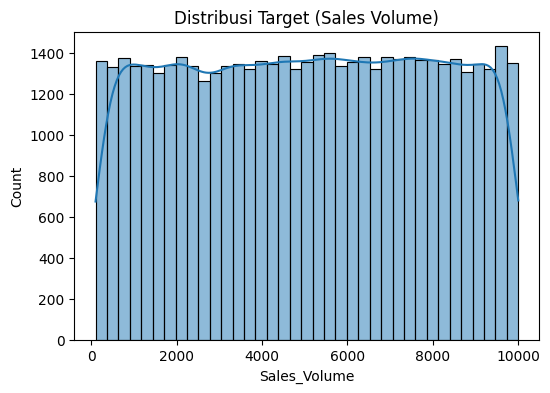

In [27]:
# cek struktur data
print(car_df1.info())

# statistik deskriptif numerik
car_df1.describe()

# missing value
car_df1.isnull().sum()

# visualisasi target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(car_df1['Sales_Volume'], kde=True)
plt.title("Distribusi Target (Sales Volume)")
plt.show()



# _Feature Engineering_

## A - Missing Value

In [28]:
# Cek jumlah missing value per kolom
car_df1.isna().sum()


,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


Berdasarkan hasil pengecekan data missing value didapatkan bahwa data tidak mengandung missing value.

## B - Kardinalitas

## C- Splitting Data

In [29]:
X = car_df1.drop('Sales_Volume', axis=1)
y = car_df1['Sales_Volume']


In [30]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (37500, 9)
Test size  :  (12500, 9)


## D- Handling Outlier

## E- Scaling

In [31]:
numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']

In [32]:
# Pisahkan fitur numerik vs kategorikal
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [33]:
print(X_train.columns)


Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD'],
      dtype='object')


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# scaling hanya kolom numerik
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


## F- Encoding

## G- Balancing Data

# _Training Model_

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform categorical columns for X_train_scaled
X_train_encoded_categorical = ohe.fit_transform(X_train_scaled[categorical_cols])
X_train_encoded_categorical_df = pd.DataFrame(X_train_encoded_categorical, columns=ohe.get_feature_names_out(categorical_cols), index=X_train_scaled.index)

# Transform categorical columns for X_test_scaled
X_test_encoded_categorical = ohe.transform(X_test_scaled[categorical_cols])
X_test_encoded_categorical_df = pd.DataFrame(X_test_encoded_categorical, columns=ohe.get_feature_names_out(categorical_cols), index=X_test_scaled.index)

# Concatenate numeric and encoded categorical features for X_train and X_test
X_train_processed = pd.concat([X_train_scaled[numeric_cols], X_train_encoded_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_scaled[numeric_cols], X_test_encoded_categorical_df], axis=1)

print("Shape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)

Shape of X_train_processed: (37500, 33)
Shape of X_test_processed: (12500, 33)


In [36]:
# Training menggunakan Regression Tree
%%time
from sklearn.tree import DecisionTreeRegressor

model_rt = DecisionTreeRegressor(max_depth=6, random_state=10)
model_rt.fit(X_train_processed, y_train)

CPU times: user 191 ms, sys: 3.04 ms, total: 194 ms
Wall time: 196 ms


DecisionTreeRegressor(max_depth=6, random_state=10)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=10)
model_knn.fit(X_train_processed, y_train)



KNeighborsRegressor(n_neighbors=10)

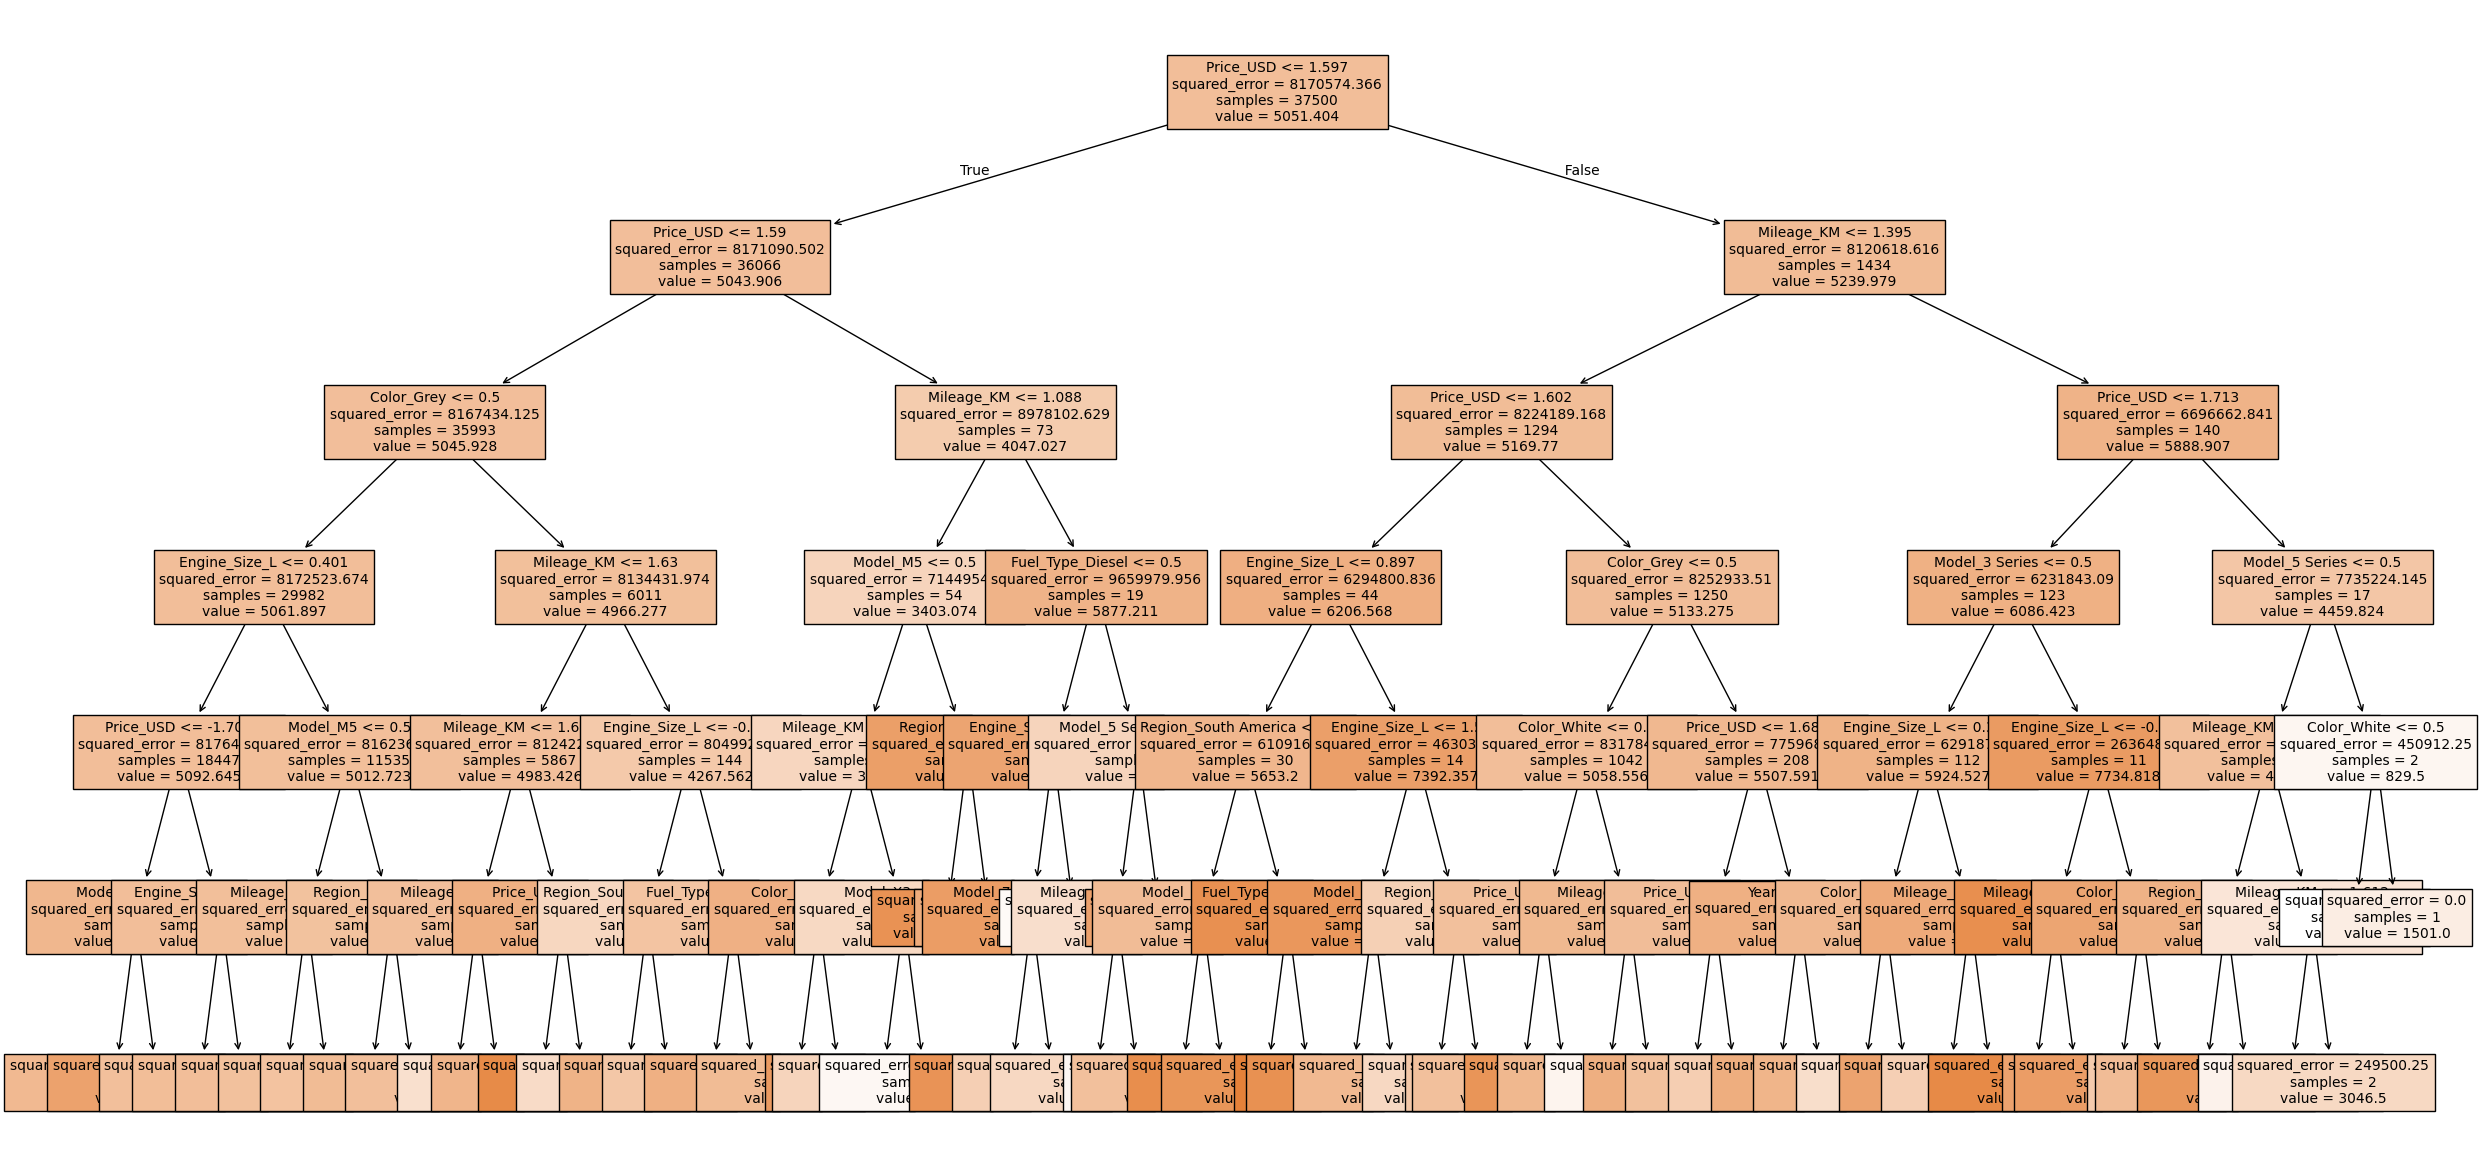

In [38]:
from sklearn import tree

plt.figure(figsize=(30,15))

# Define the feature names explicitly for plotting
feature_names_for_plot = X_train_processed.columns.tolist()

tree.plot_tree(model_rt, feature_names=feature_names_for_plot, filled=True, fontsize= 10)
plt.show()

# _Model Performance_

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_model(model, X, y, model_name):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

print('Evaluating Decision Tree Regressor (model_rt):')
print('\nTest Set:')
evaluate_regression_model(model_rt, X_test_processed, y_test, 'Decision Tree Regressor')

print('\nEvaluating K-Neighbors Regressor (model_knn):')
print('\nTest Set:')
evaluate_regression_model(model_knn, X_test_processed, y_test, 'K-Neighbors Regressor')

Evaluating Decision Tree Regressor (model_rt):

Test Set:
Decision Tree Regressor Performance:
  MAE: 2479.81
  MSE: 8204491.93
  RMSE: 2864.35
  R-squared: -0.01

Evaluating K-Neighbors Regressor (model_knn):

Test Set:
K-Neighbors Regressor Performance:
  MAE: 2556.64
  MSE: 8946773.63
  RMSE: 2991.12
  R-squared: -0.10


Berdasarkan perbandingan performa menunjukkan bahwa model Regression Tree memiliki kinerja yang lebih baik dibandingkan K-Nearest Neighbors (KNN) dalam memprediksi Sales Volume. Hal ini tercermin dari nilai MAE dan RMSE pada Regression Tree yang lebih rendah, menandakan bahwa rata-rata kesalahan prediksi lebih kecil dan lebih konsisten. Selain itu, nilai MSE yang lebih rendah menunjukkan bahwa Regression Tree menghasilkan kesalahan besar yang lebih sedikit dibandingkan KNN. Dengan demikian, model Regression Tree lebih akurat dan lebih stabil dalam menangani data ini.

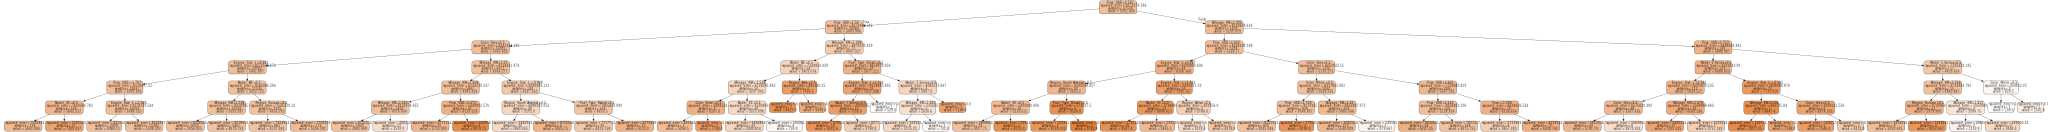

In [41]:
# Using Scikit-Learn and Graphviz

import graphviz
dot_data = tree.export_graphviz(model_rt, out_file=None, # Changed model_dt to model_rt
                                feature_names=X_train_processed.columns.tolist(), # Using processed feature names
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Kesimpulan

# Referensi

Program Studi Statistika. (2025). Modul Praktikum Machine Learning Pertemuan 2: Decision Tree and Regression Tree. Universitas Bengkulu.

Prasetya, R. (2020). Penerapan Teknik Data Mining Dengan Algoritma Classification Tree Untuk Prediksi Hujan. Jurnal Widya Climago, 2(2).

Ramadhon, R. N., Ogi, A., Agung, A. P., Putra, R., Febrihartina, S. S., & Firdaus, U. (2024). Implementasi Algoritma Decision Tree untuk Klasifikasi Pelanggan Aktif atau Tidak Aktif pada Data Bank. Karimah Tauhid, 3(2), 1860-1874.

Sari, D. P., & Nugroho, A. S. (2021). K-Nearest Neighbors dalam Tugas Regresi: Studi Kasus dan Evaluasi. Prosiding Seminar Nasional Informatika, 5(3), 112-125.